In [42]:
!pip install -q yfinance

In [43]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from pandas_datareader.data import DataReader
import yfinance as yf


from datetime import datetime

In [45]:

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [46]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-08,3135.010010,3235.850098,3111.010010,3228.270020,3228.270020,3802000,AMAZON
2022-02-09,3257.469971,3276.689941,3205.000000,3223.790039,3223.790039,3439300,AMAZON
2022-02-10,3167.000000,3214.330078,3155.000000,3180.070068,3180.070068,3413400,AMAZON
2022-02-11,3162.689941,3180.000000,3054.679932,3065.870117,3065.870117,3851600,AMAZON
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4161500,AMAZON
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2848500,AMAZON
2022-02-16,3115.810059,3176.679932,3094.689941,3162.010010,3162.010010,2635200,AMAZON
2022-02-17,3162.919922,3206.979980,3090.000000,3093.050049,3093.050049,3201600,AMAZON
2022-02-18,3109.989990,3109.989990,3017.860107,3052.030029,3052.030029,3168200,AMAZON


In [47]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,145.928741,147.479882,144.487952,146.036221,145.585332,8.953143e+07
std,17.377067,17.672455,17.146196,17.419905,17.602217,2.842349e+07
min,119.029999,120.400002,116.209999,116.360001,115.672493,4.100000e+07
25%,130.317501,131.495003,129.410000,130.465004,129.914459,6.904782e+07
50%,145.995003,147.105003,145.275002,146.114998,145.676514,8.474040e+07
75%,157.482494,160.004997,154.622498,157.604996,157.404453,1.054095e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [48]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-22 to 2022-02-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


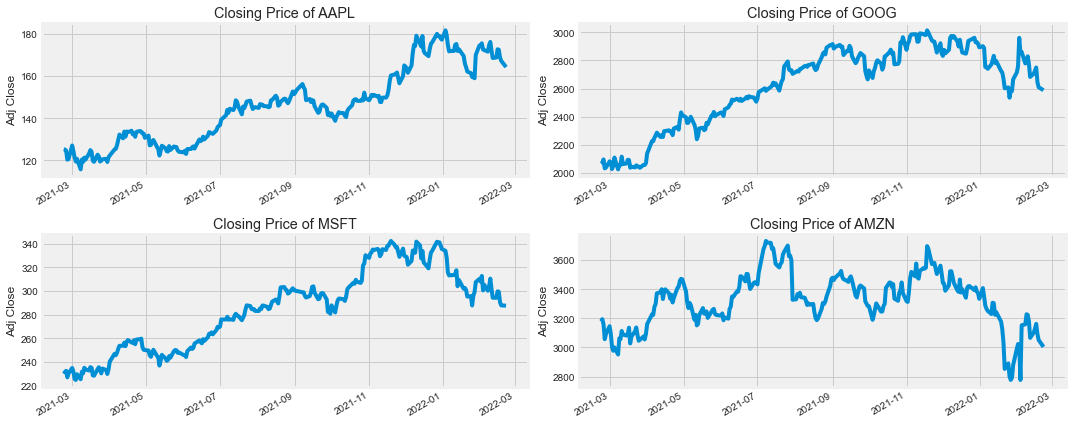

In [49]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

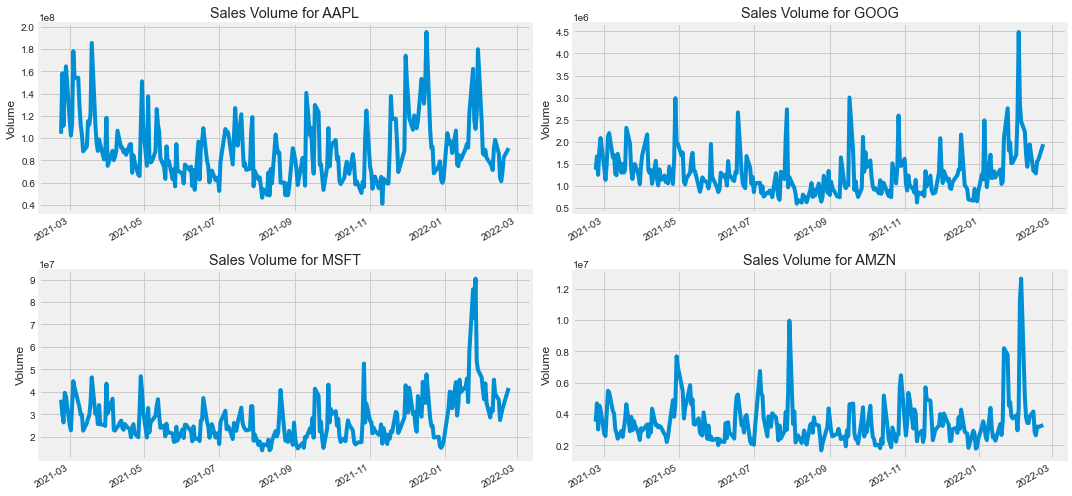

In [50]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [51]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [52]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


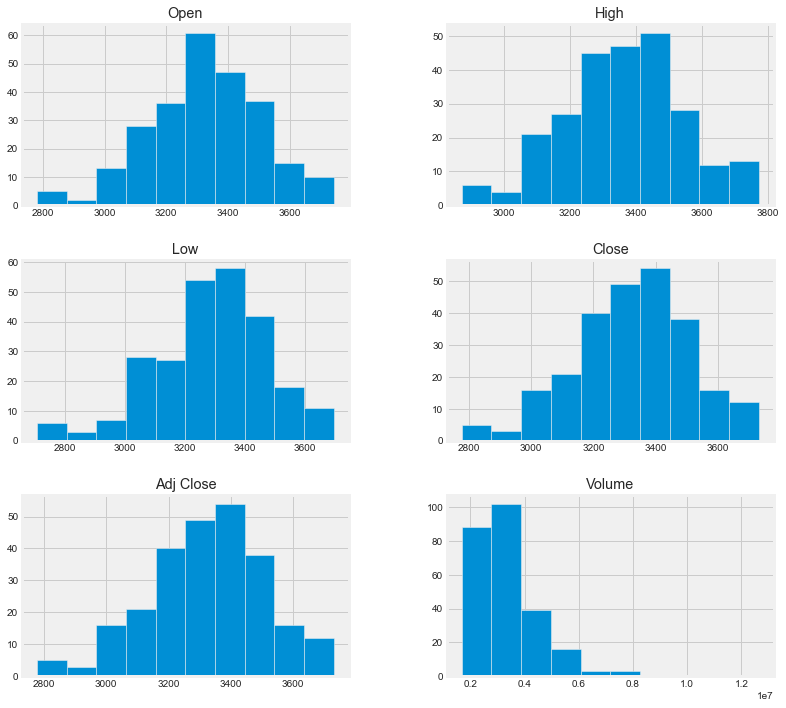

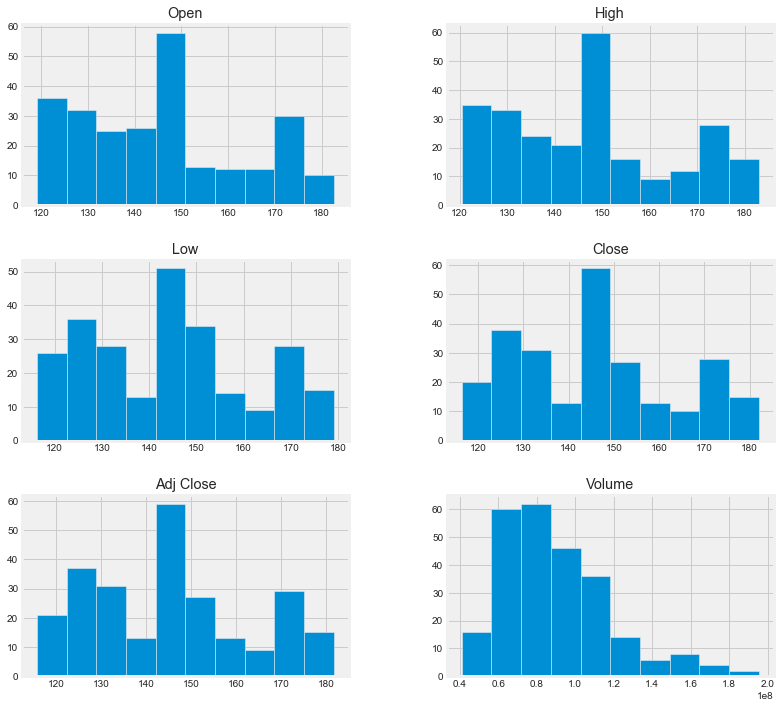

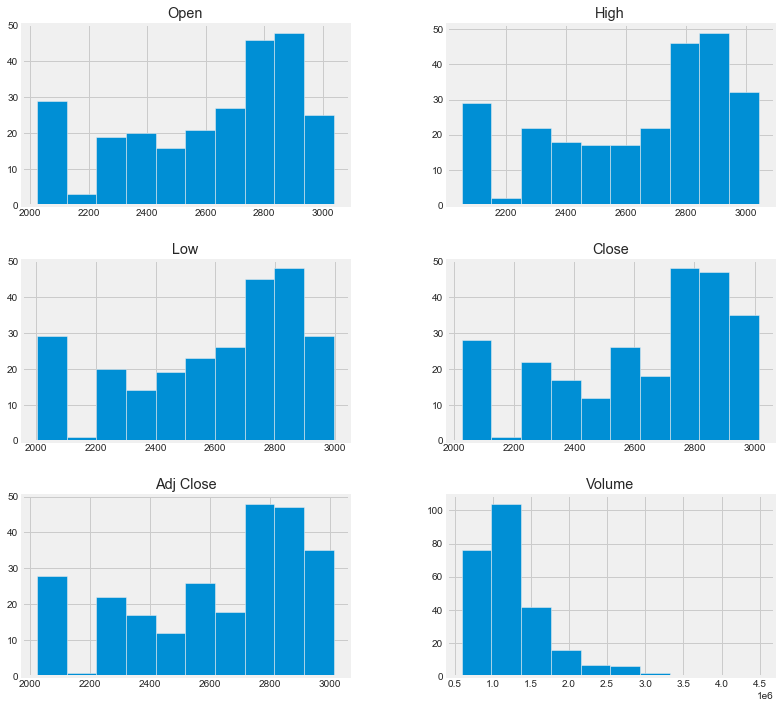

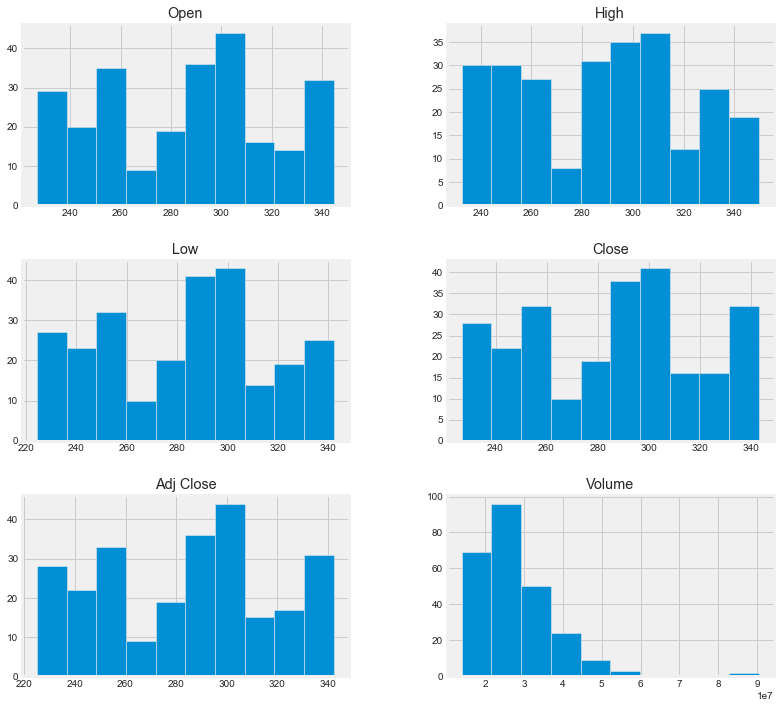

In [53]:
df.groupby("company_name").hist(figsize=(12, 12));

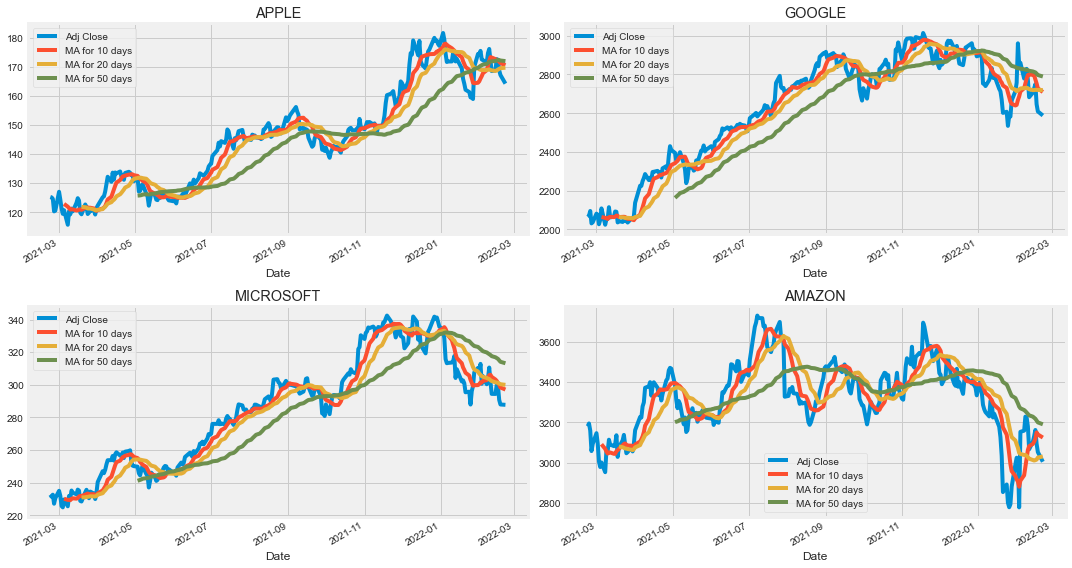

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

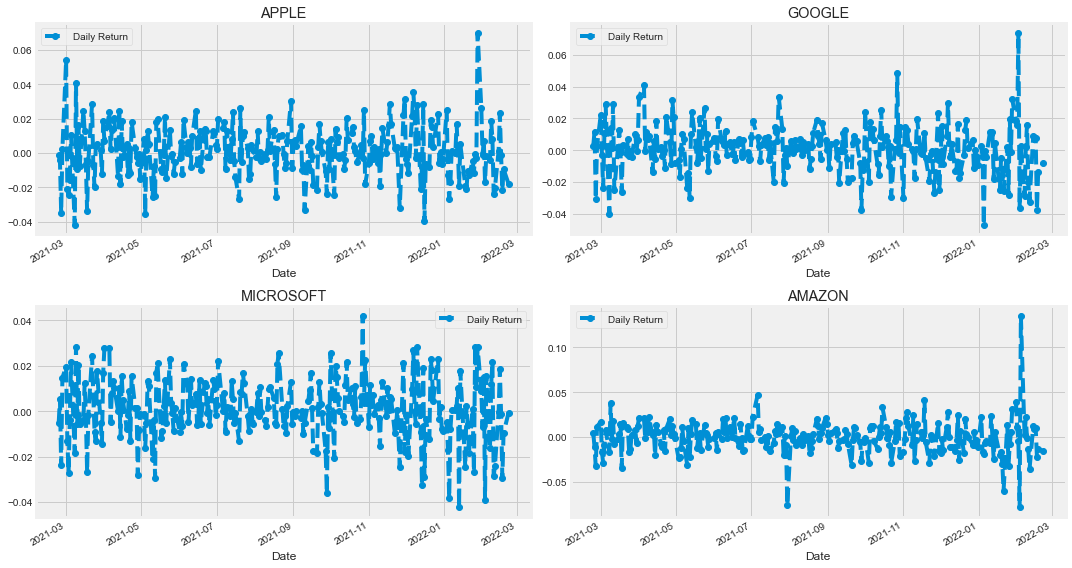

In [55]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

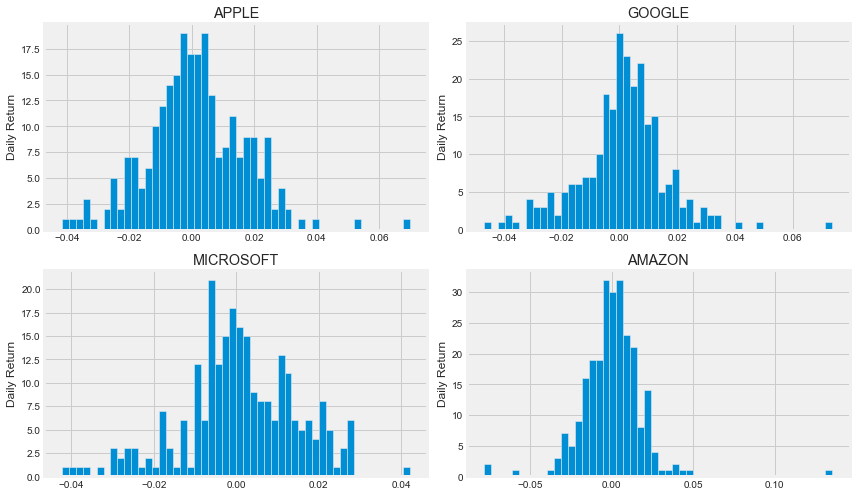

In [56]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [57]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-22,125.255539,2064.879883,232.615265,3180.739990
2021-02-23,125.116379,2070.860107,231.385284,3194.500000
2021-02-24,124.609375,2095.169922,232.654938,3159.530029
2021-02-25,120.275139,2031.359985,227.139847,3057.159912
2021-02-26,120.543549,2036.859985,230.502457,3092.929932


In [58]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-22,NaN,NaN,NaN,NaN
2021-02-23,-0.001111,0.002896,-0.005288,0.004326
2021-02-24,-0.004052,0.011739,0.005487,-0.010947
2021-02-25,-0.034783,-0.030456,-0.023705,-0.032400
2021-02-26,0.002232,0.002708,0.014804,0.011700


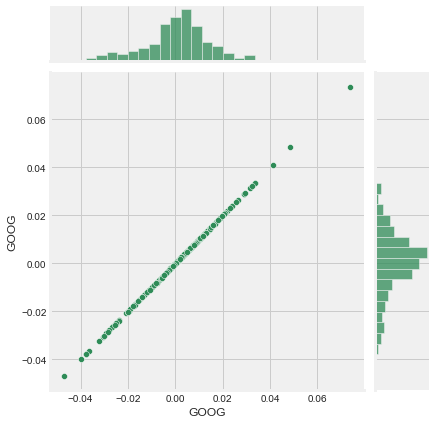

In [59]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


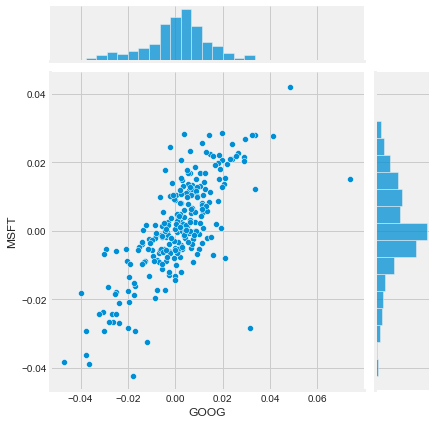

In [60]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')